In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [3]:
from google.colab import files
load = files.upload()

Saving Clean_Dataset.csv to Clean_Dataset.csv


In [15]:
df=pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [16]:
df.shape

(300153, 12)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [19]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [20]:
#df.drop(columns='Unnamed: 0',inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [22]:
df.duplicated().sum()

0

In [23]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<Axes: >

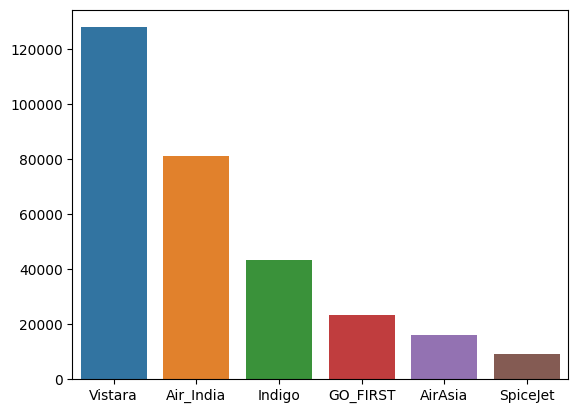

In [26]:
air=df['airline'].value_counts()
sns.barplot(data=df,x=air.index,y=air.values)

([<matplotlib.patches.Wedge at 0x7fdb5828ea10>,
 [Text(0.8809535489223089, 0.6587266843245301, 'Delhi'),
  Text(-0.3779004059372413, 1.0330495066512875, 'Mumbai'),
  Text(-1.0992131326110681, 0.04159914777206989, 'Bangalore'),
  Text(-0.6015577367721227, -0.9209388086781889, 'Kolkata'),
  Text(0.36016745105880016, -1.0393649056985748, 'Hyderabad'),
  Text(1.0109871514258975, -0.43348007987882137, 'Chennai')],
 [Text(0.4805201175939866, 0.35930546417701636, '20%'),
  Text(-0.20612749414758613, 0.5634815490825203, '20%'),
  Text(-0.5995707996060371, 0.02269044423931085, '17%'),
  Text(-0.32812240187570324, -0.5023302592790121, '15%'),
  Text(0.19645497330480005, -0.5669263121992225, '14%'),
  Text(0.5514475371413986, -0.23644367993390253, '13%')])

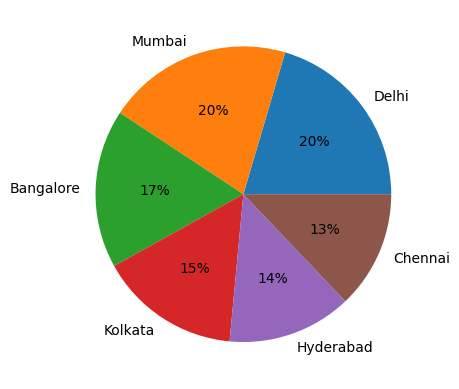

In [30]:
scity=df['source_city'].value_counts()
plt.pie(scity.values,labels=scity.index,autopct='%0.0f%%')


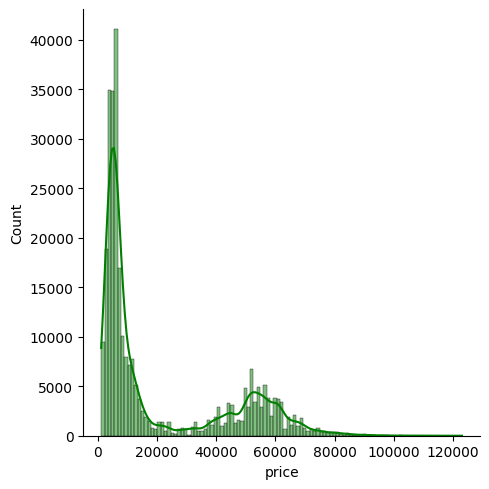

In [31]:
sns.displot(df['price'],color='green',kde=True)

duration        Axes(0.125,0.11;0.227941x0.77)
days_left    Axes(0.398529,0.11;0.227941x0.77)
price        Axes(0.672059,0.11;0.227941x0.77)
dtype: object

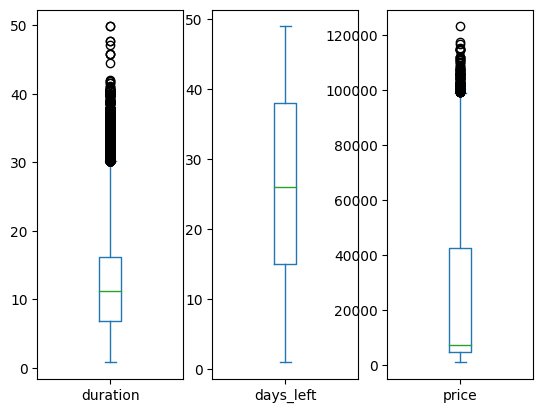

In [33]:
df.plot(kind='box',subplots=True)

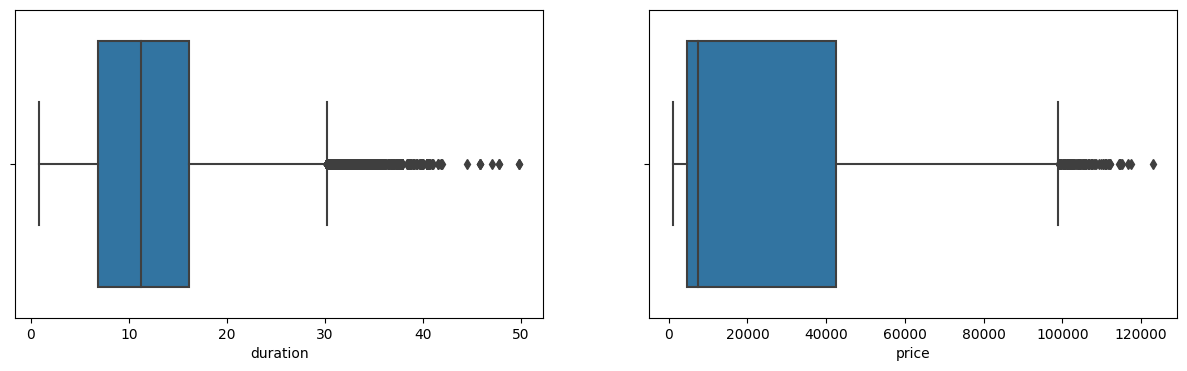

In [45]:
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.boxplot(data=df,x='duration',ax=ax[0])
sns.boxplot(df,x='price',ax=ax[1])

plt.show()

<Axes: xlabel='airline', ylabel='price'>

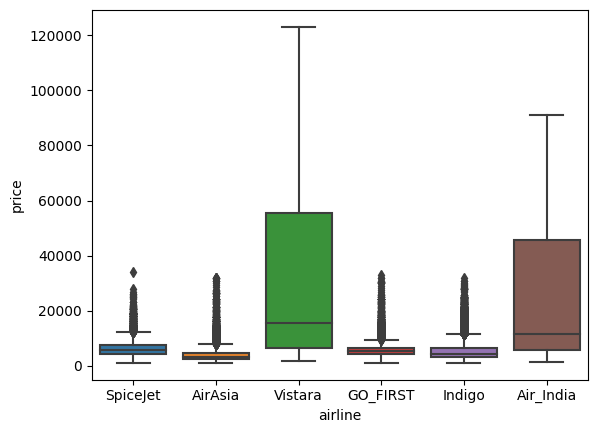

In [44]:
sns.boxplot(df,x='airline',y='price')

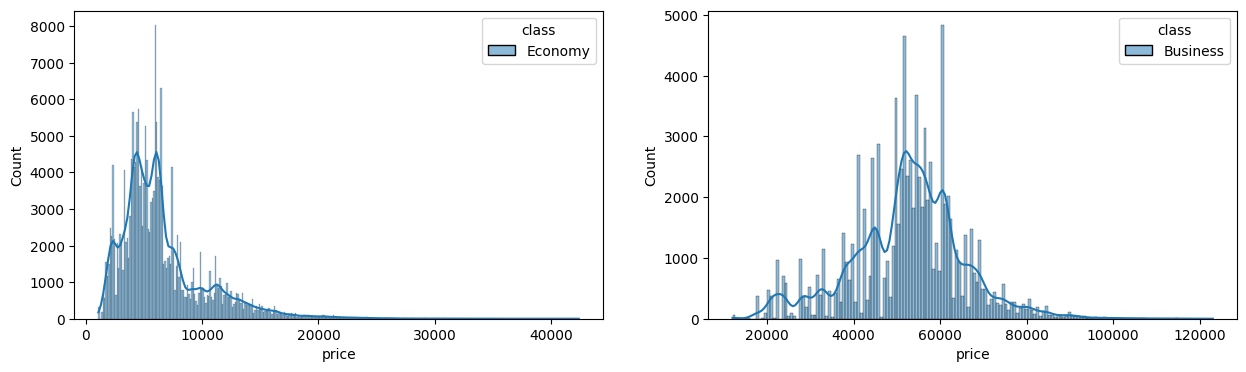

In [74]:
plt.figure (figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=df.loc[df['class']=='Economy'],x='price',kde=True,hue='class')
plt.subplot(1,2,2)
sns.histplot(data=df.loc[df['class']=='Business'],x='price',kde=True,hue='class')


plt.show()


In [77]:
#Armo un array con las columnas que contienen numeros

numcols=df.select_dtypes('number')

numcols

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


In [79]:
numcols.columns

Index(['duration', 'days_left', 'price'], dtype='object')

In [80]:
#Armo un array con las columnas que contienen objetos

objcols=df.select_dtypes('object')

objcols

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business


In [81]:
objcols.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

<ipython-input-84-b3d43b504795>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

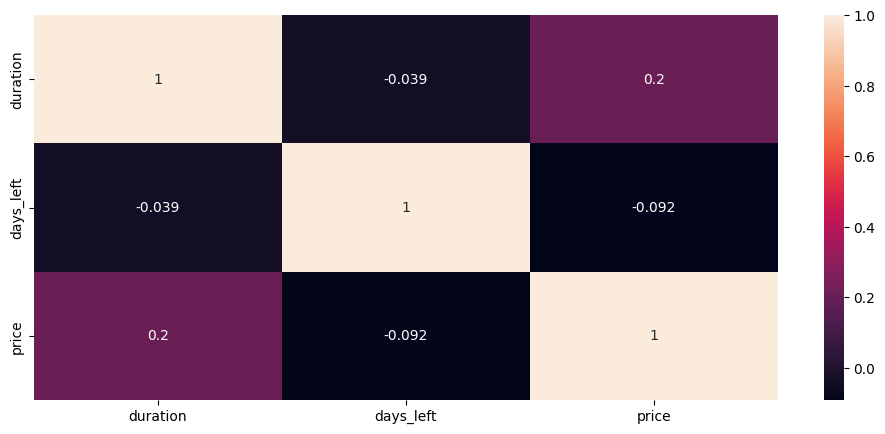

In [84]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [85]:
#Convierto las variables objetos en numeros
from sklearn.preprocessing import LabelEncoder

for i in objcols.columns:
  df[i]=LabelEncoder().fit_transform(df[i])

<Axes: >

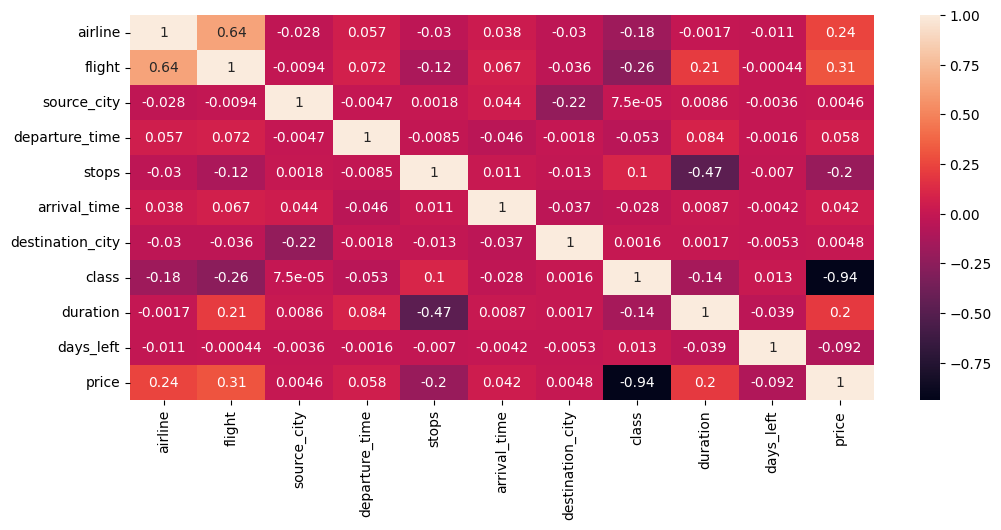

In [86]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [89]:
#Separo la variable objetivo y las variables independientes
y=df['price']
x=df.drop('price',axis=1)
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49
300149,5,1481,1,0,0,5,3,0,10.42,49
300150,5,1486,1,1,0,5,3,0,13.83,49
300151,5,1483,1,1,0,2,3,0,10.00,49


In [104]:
#Empiezo el entrenamiento y la prueba

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=555)

In [108]:
y_test

104071     5177
252580    67004
737       24908
77165      7548
202485     4079
          ...  
146756     8380
42478      3389
5259       5761
142800    16254
126736     4439
Name: price, Length: 75039, dtype: int64

In [140]:
#Regresion Lineal
#Entrenamos el modelo

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [141]:
#Ejecutamos el modelo
y_pred=model.predict(x_test)
y_pred

array([10091.86294932, 51491.00169153,  9299.32574643, ...,
        6749.82754178,  1989.71800696,  4241.20017537])

In [142]:
#Vemos la metrica r2
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)


0.9046230837443672

In [146]:
#Instalamos catboost en colab
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:

    !pip install catboost
    !pip install ipywidgets
    !jupyter nbextension enable --py widgetsnbextension

    print('Environment: Google Colab')

In [126]:
#Aplicamos ahora el metodo Catboost para entrenar el modelo

import catboost as cb

model=cb.CatBoostRegressor()
model.fit(x_train,y_train)

Learning rate set to 0.096352
0:	learn: 20655.0842749	total: 83.3ms	remaining: 1m 23s
1:	learn: 18828.1744435	total: 114ms	remaining: 57s
2:	learn: 17181.0153827	total: 144ms	remaining: 47.8s
3:	learn: 15710.8428244	total: 198ms	remaining: 49.3s
4:	learn: 14400.9458412	total: 228ms	remaining: 45.4s
5:	learn: 13220.7699147	total: 259ms	remaining: 42.9s
6:	learn: 12178.3885528	total: 290ms	remaining: 41.1s
7:	learn: 11248.8976311	total: 321ms	remaining: 39.8s
8:	learn: 10424.4104219	total: 352ms	remaining: 38.7s
9:	learn: 9698.1114908	total: 382ms	remaining: 37.8s
10:	learn: 9058.6641182	total: 416ms	remaining: 37.4s
11:	learn: 8501.6908043	total: 445ms	remaining: 36.7s
12:	learn: 8010.7012359	total: 485ms	remaining: 36.8s
13:	learn: 7582.1827701	total: 515ms	remaining: 36.3s
14:	learn: 7208.5497391	total: 546ms	remaining: 35.8s
15:	learn: 6886.7338852	total: 575ms	remaining: 35.4s
16:	learn: 6596.2217167	total: 611ms	remaining: 35.3s
17:	learn: 6348.6057880	total: 648ms	remaining: 35.4s

In [127]:
y_pred=model.predict(x_test)
y_pred

array([ 7427.50346571, 68305.04384929, 14359.1908036 , ...,
        6067.66641072,  7766.64908942,  4388.12106673])

In [128]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.981950869794665

In [130]:
#Aplicamos ahora el metodo Lasso para entrenar el modelo

from sklearn.linear_model import Lasso

model=Lasso()

model.fit(x_train,y_train)



Lasso()

In [132]:
y_pred=model.predict(x_test)
y_pred

array([10092.5198406 , 51487.91270698,  9298.21570511, ...,
        6751.06681064,  1993.26676093,  4239.98952602])

In [133]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9046228943131797